# ЧАСТИНА 1

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [2]:
# Завантаження
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

# one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(x_train.shape, y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000, 10)


In [11]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),

    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 843,658 (3.22 MB)

 Trainable params: 843,658 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    x_train,
    y_train,
    epochs=7,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7636 - loss: 0.6526 - val_accuracy: 0.8722 - val_loss: 0.3519
Epoch 2/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8827 - loss: 0.3203 - val_accuracy: 0.8950 - val_loss: 0.2893
Epoch 3/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9034 - loss: 0.2674 - val_accuracy: 0.8971 - val_loss: 0.2808
Epoch 4/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9152 - loss: 0.2287 - val_accuracy: 0.9071 - val_loss: 0.2555
Epoch 5/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9278 - loss: 0.1965 - val_accuracy: 0.9115 - val_loss: 0.2410
Epoch 6/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9351 - loss: 0.1733 - val_accuracy: 0.9072 - val_loss: 0.2672
Epoch 7/7
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9443 - loss: 0.1512 - val_accuracy: 0.9133 - val_loss: 0.2442


In [7]:
import matplotlib.pyplot as plt
def plot_result(data):
  history_dict = data.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim(0, 0.5)
  plt.legend()
  plt.show()

  plt.clf()
  val_acc_values = history_dict['val_accuracy']
  plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
  plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim(0.8, 1.0)
  plt.legend()

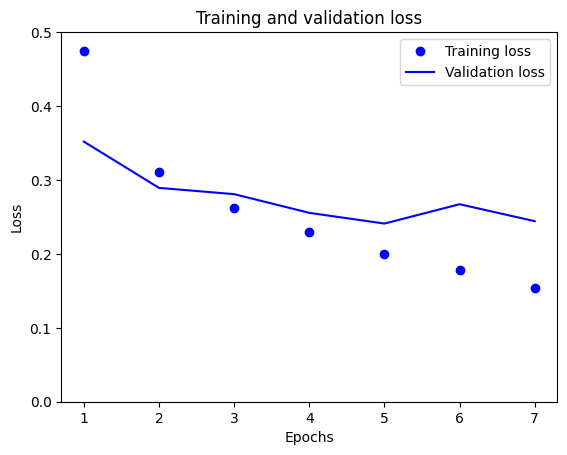

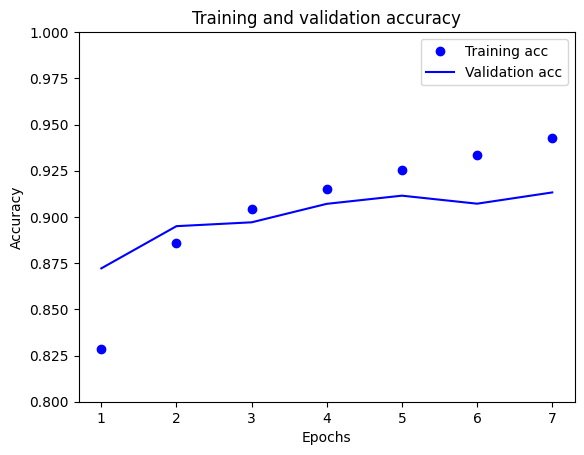

In [13]:
plot_result(history)

# ЧАСТИНА 2

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.image import resize

In [2]:
def plot_result(data):
  history_dict = data.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim(0, 0.5)
  plt.legend()
  plt.show()

  plt.clf()
  val_acc_values = history_dict['val_accuracy']
  plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
  plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim(0.8, 1.0)
  plt.legend()

In [3]:
# Завантаження
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація та розширення до 3 каналів
x_train = np.stack([x_train] * 3, axis=-1) / 255.0
x_test = np.stack([x_test] * 3, axis=-1) / 255.0

# Масштабування зображень до 224x224 (для VGG16)
x_train = np.array([resize(img, (32, 32)) for img in x_train])
x_test = np.array([resize(img, (32, 32)) for img in x_test])

# one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(x_train.shape, y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 32, 32, 3) (60000, 10)


In [4]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block4_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [7]:
model = models.Sequential([
   conv_base,
   layers.Dropout(0.15),
   layers.Flatten(),
   layers.Dense(512, activation="relu"),
   layers.Dropout(0.15),
   layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 13,246,986 (50.53 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [9]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.4893 - loss: 1.3456 - val_accuracy: 0.8558 - val_loss: 0.3981
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.8649 - loss: 0.3949 - val_accuracy: 0.8799 - val_loss: 0.3532
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8910 - loss: 0.3268 - val_accuracy: 0.9043 - val_loss: 0.2888
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.8999 - loss: 0.2892 - val_accuracy: 0.9038 - val_loss: 0.2825
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9065 - loss: 0.2749 - val_accuracy: 0.9076 - val_loss: 0.2728
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9115 - loss: 0.2658 - val_accuracy: 0.9023 - val_loss: 0.2945
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9154 - loss: 0.2487 - val_accuracy: 0.9087 - val_loss: 0.2683
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9196 - loss: 0.2356 - 

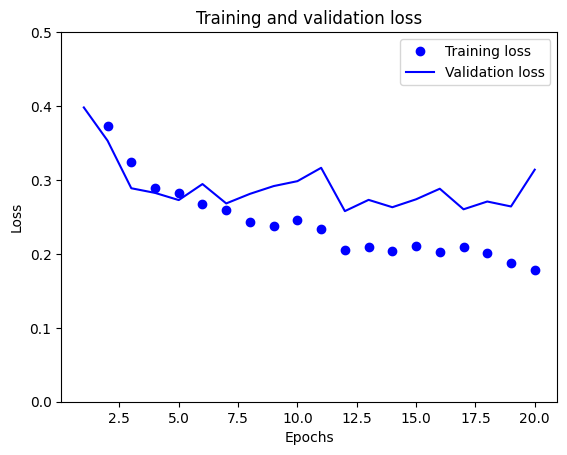

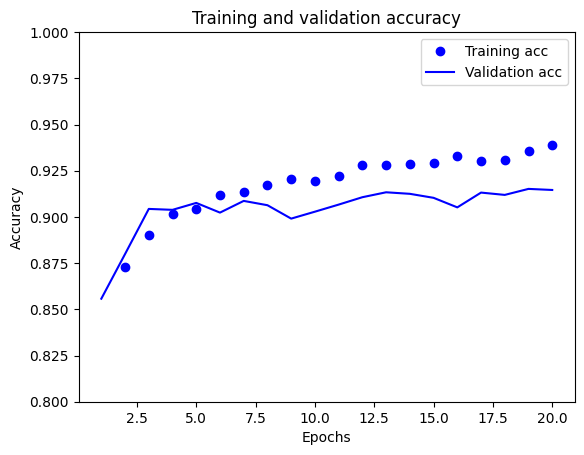

In [10]:
plot_result(history)

# ВИСНОВКИ

Не дивлячись на однакову точність в остаточному розрахунку, ці моделі мають суттєві відмінності.
Перша згорткова модель була дуже вразлива до перенавчання. Навчання було скорочено до 7 епох, тому що далі точність на валідачійних даних не тільки зупинялась, а навіть зманшувалась до 80-85.

У другій частині використовується передвиборна модель. Я намагався змінювати тільки необхідні параметри, щоб краще побачити різницю у результатах.
Без використання донавчання точність у валідації мала поріг в 87, наступні епохи призводили до перенавчання.
донавчання забезпечує набагато краще узагальнення, а дропаут запобігає перенавчанню навіть при 20 епохах.
Цікавим спостереженням є, що нова модель вже з 3 епохи почала показувати хороший результат. А у першій епосу видно стрибок між тренуванням і валідацією в 35%. Це вказує на добре збалансовану заморожену частину VGG16.
Нажаль, час виконання значно зростає з 2 хв до 10-12хв (Colab GPU T4). І Kaggle лише на 5-10% швидше працює. Натомість, такий тип мережі дає змогу обробляти набагато складніші вхідні данні: 224х224х3 типовий формат вхідних даних для VGG16.